## **Import Data**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_csv = "/content/gdrive/My Drive/Colab Notebooks/2020-Jan.csv"
raw_data = pd.read_csv(data_csv)

In [4]:
raw_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb


## Exploratory Analysis

In [5]:
visitor = raw_data['user_id'].nunique()
print ("Visitors: {}".format(visitor))

sessions = raw_data['user_session'].nunique()
print ("User Sessions: {}".format(sessions))

products = raw_data['product_id'].nunique()
print ("Products: {}".format(products))

Visitors: 410073
User Sessions: 965351
Products: 45484


In [6]:
# Example Customer Journey
raw_data.loc[raw_data.user_session == "546f6af3-a517-4752-a98b-80c4c5860711"].sort_values(
  by='event_time')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
8,2020-01-01 00:00:57 UTC,view,5726464,1487580005268456287,NaN,NaN,5.56,420652863,546f6af3-a517-4752-a98b-80c4c5860711
17,2020-01-01 00:01:37 UTC,view,5741344,1487580005427839846,NaN,irisk,4.29,420652863,546f6af3-a517-4752-a98b-80c4c5860711
22,2020-01-01 00:01:48 UTC,view,5741352,1487580005427839846,NaN,irisk,3.33,420652863,546f6af3-a517-4752-a98b-80c4c5860711
25,2020-01-01 00:02:09 UTC,view,5741345,1487580005427839846,NaN,irisk,3.33,420652863,546f6af3-a517-4752-a98b-80c4c5860711
42,2020-01-01 00:04:14 UTC,view,5755166,1487580005268456287,NaN,NaN,5.56,420652863,546f6af3-a517-4752-a98b-80c4c5860711
50,2020-01-01 00:04:50 UTC,view,5726464,1487580005268456287,NaN,NaN,5.56,420652863,546f6af3-a517-4752-a98b-80c4c5860711
56,2020-01-01 00:05:38 UTC,view,5699801,1487580005268456287,NaN,runail,6.11,420652863,546f6af3-a517-4752-a98b-80c4c5860711
67,2020-01-01 00:06:45 UTC,view,5858887,1487580005268456287,NaN,NaN,6.83,420652863,546f6af3-a517-4752-a98b-80c4c5860711
73,2020-01-01 00:07:11 UTC,view,5847343,1487580005268456287,NaN,NaN,6.98,420652863,546f6af3-a517-4752-a98b-80c4c5860711


In [7]:
# Example Customer History
raw_data[raw_data.user_id == 420652863].sort_values(by='event_time')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
8,2020-01-01 00:00:57 UTC,view,5726464,1487580005268456287,NaN,NaN,5.56,420652863,546f6af3-a517-4752-a98b-80c4c5860711
17,2020-01-01 00:01:37 UTC,view,5741344,1487580005427839846,NaN,irisk,4.29,420652863,546f6af3-a517-4752-a98b-80c4c5860711
22,2020-01-01 00:01:48 UTC,view,5741352,1487580005427839846,NaN,irisk,3.33,420652863,546f6af3-a517-4752-a98b-80c4c5860711
25,2020-01-01 00:02:09 UTC,view,5741345,1487580005427839846,NaN,irisk,3.33,420652863,546f6af3-a517-4752-a98b-80c4c5860711
...,...,...,...,...,...,...,...,...,...
4187224,2020-01-31 11:39:05 UTC,view,5779231,1487580004832248652,NaN,beautix,9.37,420652863,baa101e8-4a5f-46fb-aa5a-896af71de607
4187243,2020-01-31 11:39:21 UTC,view,5714057,1487580004832248652,NaN,beautix,9.37,420652863,baa101e8-4a5f-46fb-aa5a-896af71de607
4187252,2020-01-31 11:39:26 UTC,view,5714059,1487580004832248652,NaN,beautix,9.37,420652863,baa101e8-4a5f-46fb-aa5a-896af71de607
4187259,2020-01-31 11:39:29 UTC,view,5798099,1487580004832248652,NaN,beautix,9.89,420652863,baa101e8-4a5f-46fb-aa5a-896af71de607


In [ ]:
# Aggregate prices by event_type
pd.options.display.float_format = '{:.0f}'.format
raw_data.groupby('event_type')['price'].agg('sum')

event_type
cart                6024629
purchase            1321535
remove_from_cart    4357855
view               25458949
Name: price, dtype: float64

In [8]:
# Aggregate count of columns by event_type
raw_data.groupby('event_type').agg('count')

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
event_type,,,,,,,,
cart,1148323,1148323,1148323,14553,661082,1148323,1148323,1147259
purchase,263797,263797,263797,3818,152084,263797,263797,263797
remove_from_cart,815024,815024,815024,8269,464341,815024,815024,814782
view,2037608,2037608,2037608,48079,1211615,2037608,2037608,2037600


In [10]:
raw_data.groupby('brand').agg('count')

,event_time,event_type,product_id,category_id,category_code,price,user_id,user_session
brand,,,,,,,,
airnails,15204,15204,15204,15204,0,15204,15204,15203
almea,924,924,924,924,0,924,924,924
andrea,68,68,68,68,0,68,68,68
ardell,6030,6030,6030,6030,0,6030,6030,6030
arganoil,195,195,195,195,0,195,195,195
...,...,...,...,...,...,...,...,...
ypsed,547,547,547,547,0,547,547,547
yu-r,408,408,408,408,0,408,408,407
zab,20,20,20,20,0,20,20,20


In [11]:
raw_data.isna().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4190033
brand            1775630
price                  0
user_id                0
user_session        1314
dtype: int64

In [12]:
raw_data.shape

(4264752, 9)

Category code has a lot of null values so it won't be a useful column for features. Brand has some nulls, but it can still be useful to understand if customers gravitate towards top brands.

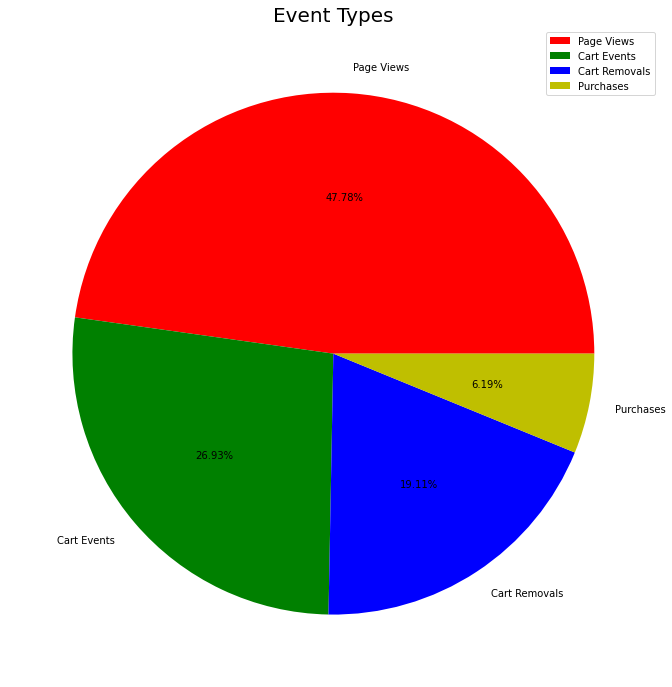

In [13]:
labels = ['Page Views', 'Cart Events', 'Cart Removals', 'Purchases']
size = raw_data['event_type'].value_counts()
colors = [ 'r', 'g', 'b', 'y']

plt.rcParams['figure.figsize'] = (12, 12)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.title('Event Types', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

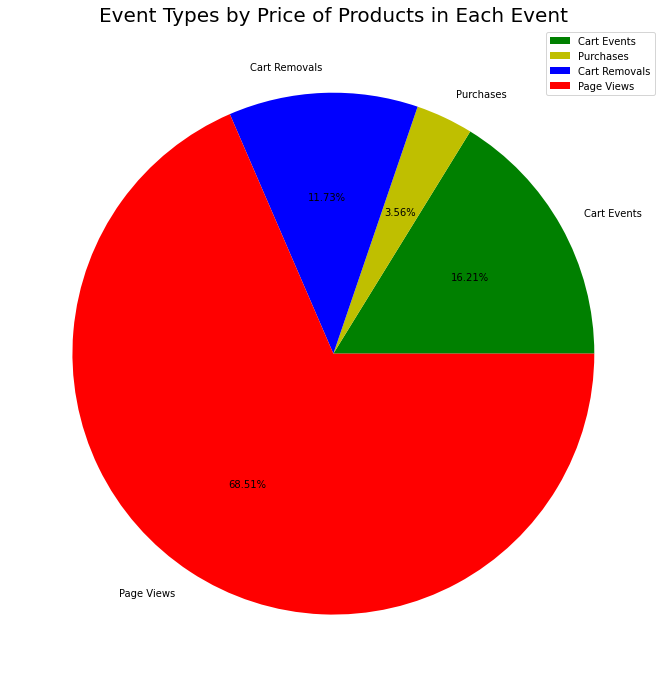

In [14]:
labels = ['Cart Events', 'Purchases', 'Cart Removals', 'Page Views']
size = raw_data.groupby('event_type')['price'].agg('sum')
colors = [ 'g', 'y', 'b', 'r']

plt.rcParams['figure.figsize'] = (12, 12)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.title('Event Types by Price of Products in Each Event', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()



*   Page views
*   Sessions per user
*   Number of products purchased
*   Number of products added to shopping car
*   Number of products removed from shopping cart
*   Total spend
*   Spend per visit
*   Total shopping cart actions per visit









## Prepare Customer Features for Segmentation

In [16]:
raw_data.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [17]:
user_features = pd.DataFrame(raw_data.groupby(by=['user_id'])['user_session'].count()).rename(columns = {'user_session':'pageviews'})
user_features.loc[:, 'Sessions'] = raw_data.groupby(by=['user_id'])['user_session'].nunique()

purchases = raw_data.query('event_type == "purchase"').groupby(by=['user_id'])['price'].count()
features = pd.merge(user_features, purchases, how = 'left', on='user_id').rename(columns = {'price':'ItemsPurchased'})

cart_added = raw_data.query('event_type == "cart"').groupby(by=['user_id'])['price'].count()
features = pd.merge(features, cart_added, how = 'left', on='user_id').rename(columns = {'price':'items_added'})

cart_removed = raw_data.query('event_type == "remove_from_cart"').groupby(by=['user_id'])['price'].count()
features = pd.merge(features, cart_removed, how = 'left', on='user_id').rename(columns = {'price':'items_removed'})

totalprice = raw_data.query('event_type == "purchase"').groupby(by=['user_id'])['price'].sum()
features = pd.merge(features, totalprice, how = 'left', on='user_id').rename(columns = {'price':'totalPrice'})
features = features.fillna(0)

features['pricePerSession'] = features['totalPrice'] / features['Sessions']
features['pagesPerSession'] = features['pageviews'] / features['Sessions']
features['addedPerSession'] = features['items_added'] / features['Sessions']
features['removedPerSession'] = features['items_removed'] / features['Sessions']
features['purchasePerSession'] = features['ItemsPurchased'] / features['Sessions']

In [18]:
features.head()

,pageviews,Sessions,ItemsPurchased,items_added,items_removed,totalPrice,pricePerSession,pagesPerSession,addedPerSession,removedPerSession,purchasePerSession
user_id,,,,,,,,,,,
465496,3,2,0.0,0.0,0.0,0.0,0.00,1.5,0.0,0.0,0.0
4661182,5,1,0.0,0.0,0.0,0.0,0.00,5.0,0.0,0.0,0.0
6217356,1,1,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0
9582366,1,1,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0
10280338,81,2,1.0,17.0,27.0,18.1,9.05,40.5,8.5,13.5,0.5


In [36]:
check =  features['Sessions']==0
check1 = features[check]
check1.head()

,pageviews,Sessions,ItemsPurchased,items_added,items_removed,totalPrice,pricePerSession,pagesPerSession,addedPerSession,removedPerSession,purchasePerSession
user_id,,,,,,,,,,,
349320233,0,0,0.0,0.0,15.0,0.0,NaN,NaN,NaN,inf,NaN
372698574,0,0,0.0,1.0,0.0,0.0,NaN,NaN,inf,NaN,NaN
420729564,0,0,0.0,10.0,0.0,0.0,NaN,NaN,inf,NaN,NaN
480006836,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
497105799,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [37]:
features = features[features.Sessions != 0]

In [19]:
purchase = raw_data.query('event_type == "purchase"')
purchase = purchase.dropna(axis='rows')

In [20]:
print(purchase.groupby('user_id').user_id.agg([len]).mean())
print(purchase.groupby('user_id').price.agg([sum]).mean())

len    1.51341
dtype: float64
sum    21.701767
dtype: float64


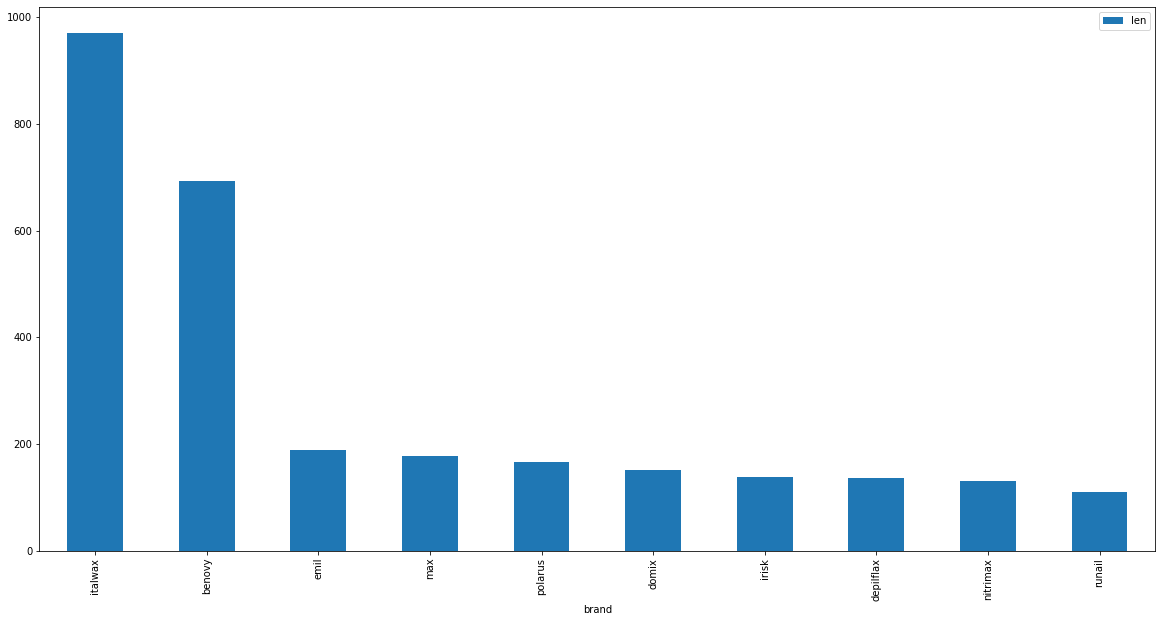

In [21]:
purchases_with_brands = purchase.loc[purchase.brand.notnull()]
top_sellers = purchases_with_brands.groupby('brand').brand.agg([len]).sort_values(
  by='len', ascending=False)
top_sellers.head(10).plot(kind='bar', figsize=(20,10))

In [22]:
pd.options.mode.chained_assignment = None 
topbrands = list(top_sellers[:5].index)

purchase.loc[(purchase['brand'] != topbrands[0]) & (purchase['brand'] != topbrands[1])
& (purchase['brand'] != topbrands[2]) & (purchase['brand'] != topbrands[3]) 
& (purchase['brand'] != topbrands[1])
& (purchase['brand'] != topbrands[4]),"brand"] = "other"

In [ ]:
br = topbrands
br.append('other')
print(br)
for brandcat in br:
  purchase[brandcat] = purchase[purchase["brand"] == brandcat]['price']
  purchase[brandcat].fillna(0, inplace = True)

['italwax', 'benovy', 'emil', 'max', 'polarus', 'other']


In [ ]:
purchase.drop(columns = ['event_time', 'event_type', 'product_id', 'category_id',	
  'category_code', 'brand',	'price',	'user_session'], inplace=True)
purchase_features = purchase.groupby(by=['user_id']).sum()

In [ ]:
features = pd.merge(features, purchase_features, how = 'left', on='user_id')
features = features.fillna(0)
features.shape

(410073, 17)

In [38]:
features.head()

,pageviews,Sessions,ItemsPurchased,items_added,items_removed,totalPrice,pricePerSession,pagesPerSession,addedPerSession,removedPerSession,purchasePerSession
user_id,,,,,,,,,,,
465496,3,2,0.0,0.0,0.0,0.0,0.00,1.5,0.0,0.0,0.0
4661182,5,1,0.0,0.0,0.0,0.0,0.00,5.0,0.0,0.0,0.0
6217356,1,1,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0
9582366,1,1,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0
10280338,81,2,1.0,17.0,27.0,18.1,9.05,40.5,8.5,13.5,0.5


## Correlation Analysis of Features

In [24]:
features.corr(method='pearson', min_periods=1)

,pageviews,Sessions,ItemsPurchased,items_added,items_removed,totalPrice,pricePerSession,pagesPerSession,addedPerSession,removedPerSession,purchasePerSession
pageviews,1.000000,0.505029,0.546303,0.830212,0.810892,0.466787,0.184823,0.473229,0.386350,0.417160,0.234255
Sessions,0.505029,1.000000,0.171059,0.205974,0.172285,0.148215,0.005984,0.015563,0.007567,0.016099,0.008757
ItemsPurchased,0.546303,0.171059,1.000000,0.524104,0.347301,0.843056,0.493587,0.344961,0.279343,0.185244,0.631802
items_added,0.830212,0.205974,0.524104,1.000000,0.696907,0.448307,0.206452,0.529656,0.575973,0.418483,0.259391
items_removed,0.810892,0.172285,0.347301,0.696907,1.000000,0.291517,0.099234,0.429272,0.316152,0.546297,0.127757
totalPrice,0.466787,0.148215,0.843056,0.448307,0.291517,1.000000,0.647423,0.302785,0.246356,0.161032,0.544358
pricePerSession,0.184823,0.005984,0.493587,0.206452,0.099234,0.647423,1.000000,0.416347,0.343951,0.198674,0.806292
pagesPerSession,0.473229,0.015563,0.344961,0.529656,0.429272,0.302785,0.416347,1.000000,0.874213,0.824020,0.504637
addedPerSession,0.386350,0.007567,0.279343,0.575973,0.316152,0.246356,0.343951,0.874213,1.000000,0.662381,0.411704
removedPerSession,0.417160,0.016099,0.185244,0.418483,0.546297,0.161032,0.198674,0.824020,0.662381,1.000000,0.241017


### PCA **Analysis**

In [39]:
from sklearn.preprocessing import StandardScaler
arr = features.values
arr = np.nan_to_num(arr)
scaler = StandardScaler()
features_std = scaler.fit_transform(arr)

In [40]:
features.shape

(410018, 11)

In [41]:
from sklearn.decomposition import PCA
features_std = np.nan_to_num(features_std)
pca = PCA()
pca.fit(features_std)
pca.explained_variance_ratio_

array([0.46393644, 0.17699501, 0.15033788, 0.07386418, 0.04495797,
       0.0373212 , 0.02634952, 0.0104344 , 0.00829055, 0.00473263,
       0.00278022])

Text(0, 0.5, 'Cumulative Explained Variance')

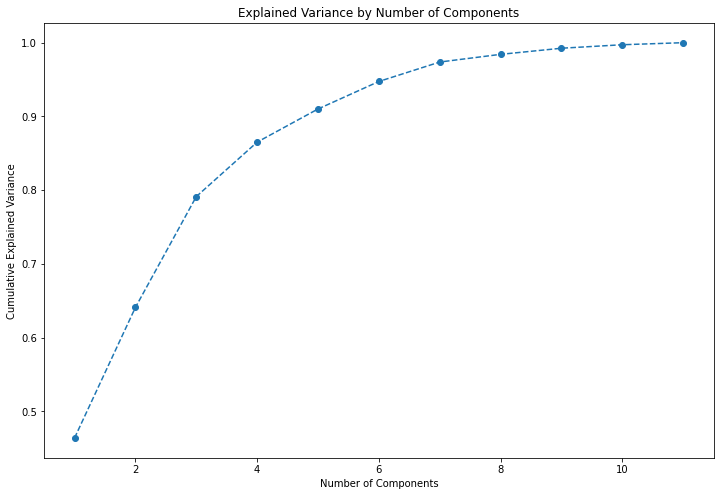

In [46]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 12), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [47]:
# Choose 3 components since it explains ~80% of the variance
pca = PCA(n_components = 3)
pca.fit(features_std)
pca.transform(features_std)
scores_pca = pca.transform(features_std)

### Fit PCA to Clustering

In [52]:
#Compute within cluster sum of squares across multiple k
from sklearn.cluster import KMeans, MiniBatchKMeans

wcss = []
for k in range(1,21):
  kmeans_pca = KMeans(n_clusters = k, init = "k-means++", random_state = 21)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

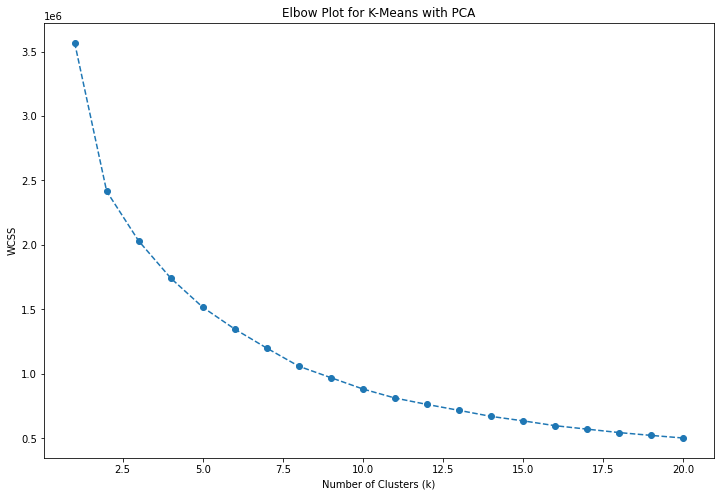

In [55]:
plt.figure(figsize=(12,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = "--")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Plot for K-Means with PCA')
plt.show()

### Fit K-Means model to 5 clusters

In [120]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 21)
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

### Analyze Results of Clustering

In [121]:
seg_pca_kmeans = pd.concat([features.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
seg_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
seg_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [122]:
seg_pca_kmeans.head()

,pageviews,Sessions,ItemsPurchased,items_added,items_removed,totalPrice,pricePerSession,pagesPerSession,addedPerSession,removedPerSession,purchasePerSession,Component 1,Component 2,Component 3,Segment K-means PCA
0,3,2,0.0,0.0,0.0,0.0,0.00,1.5,0.0,0.0,0.0,-0.533616,0.016427,-0.022987,3
1,5,1,0.0,0.0,0.0,0.0,0.00,5.0,0.0,0.0,0.0,-0.411128,0.052305,0.131787,3
2,1,1,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,-0.575912,-0.014861,0.016863,3
3,1,1,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,-0.575912,-0.014861,0.016863,3
4,81,2,1.0,17.0,27.0,18.1,9.05,40.5,8.5,13.5,0.5,4.615840,1.809177,2.008160,0


In [123]:
seg_pca_kmeans['Segment'] = seg_pca_kmeans['Segment K-means PCA'].map({
      0:'Segment 1',
      1:'Segment 2',
      2:'Segment 3',
      3:'Segment 4',
      #4:'Segment 5',
      #5:'Segment 6'
})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Clusters by PCA Component 1 and 2')

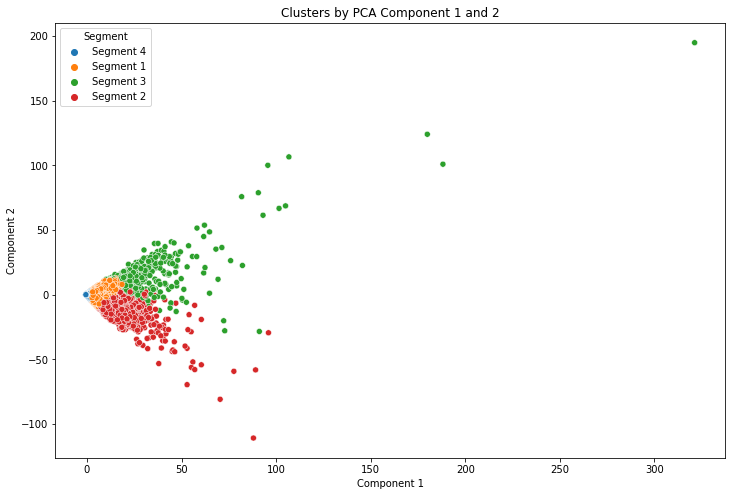

In [124]:
import seaborn as sns
x_axis = seg_pca_kmeans['Component 1']
y_axis = seg_pca_kmeans['Component 2']
plt.figure(figsize = (12, 8))
sns.scatterplot(x_axis, y_axis, hue = seg_pca_kmeans['Segment'])
plt.title('Clusters by PCA Component 1 and 2')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Clusters by PCA Component 1 and 3')

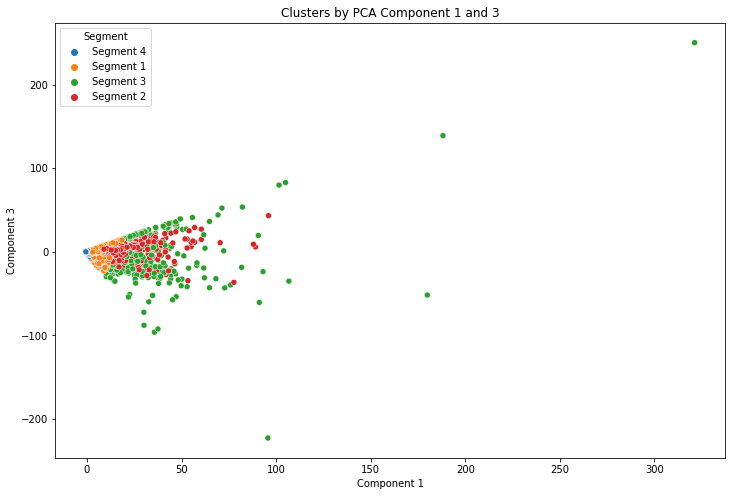

In [125]:
import seaborn as sns
x_axis = seg_pca_kmeans['Component 1']
y_axis = seg_pca_kmeans['Component 3']
plt.figure(figsize = (12, 8))
sns.scatterplot(x_axis, y_axis, hue = seg_pca_kmeans['Segment'])
plt.title('Clusters by PCA Component 1 and 3')

Text(0.5, 1.0, 'Customers across Segments')

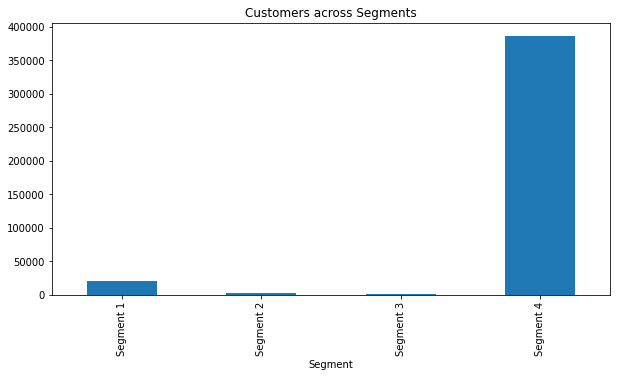

In [126]:
segments_size = seg_pca_kmeans.groupby('Segment')['Segment'].agg('count')
segments_size.plot(kind='bar', figsize=(10,5))
plt.title('Customers across Segments')

In [127]:
seg_pca_kmeans.groupby('Segment').mean()

,pageviews,Sessions,ItemsPurchased,items_added,items_removed,totalPrice,pricePerSession,pagesPerSession,addedPerSession,removedPerSession,purchasePerSession,Component 1,Component 2,Component 3,Segment K-means PCA
Segment,,,,,,,,,,,,,,,
Segment 1,90.270496,9.162171,7.800019,27.975215,22.499976,37.586779,11.621369,21.934832,8.333318,5.390032,2.221987,5.081116,-0.244334,-0.411970,0
Segment 2,113.645765,4.201217,27.345812,42.261582,20.427234,140.111703,70.010144,53.389920,20.165078,9.222041,13.556923,15.073832,-9.426082,0.926110,1
Segment 3,645.921329,68.013986,22.736014,191.038462,246.190559,85.657203,7.703889,93.919793,36.021513,40.613523,2.213823,27.250126,13.839870,-5.558625,2
Segment 4,4.637873,1.885140,0.082365,0.964371,0.433225,0.516372,0.199379,2.246705,0.469940,0.161784,0.029459,-0.393952,0.044617,0.025024,3


### Visualize Key Browsing Behaviours across Segments

In [128]:
y_axis = seg_pca_kmeans.groupby('Segment')['Sessions'].mean().to_frame(name = 'avg')
y_axis = y_axis['avg']
print(y_axis)

Segment
Segment 1     9.162171
Segment 2     4.201217
Segment 3    68.013986
Segment 4     1.885140
Name: avg, dtype: float64


Text(0.5, 1.0, 'Average Sessions in the Month by Segment')

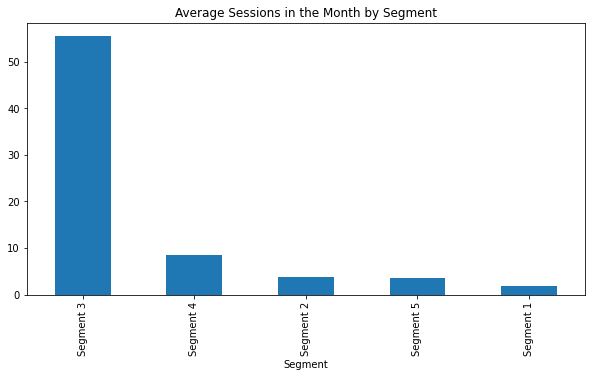

In [91]:
segments_sessions = seg_pca_kmeans.groupby('Segment').Sessions.mean().sort_values(ascending=False)
segments_sessions.plot(kind='bar', figsize=(10,5))
plt.title('Average Sessions in the Month by Segment')

Text(0.5, 1.0, 'Average Items Purchased in the Month by Segment')

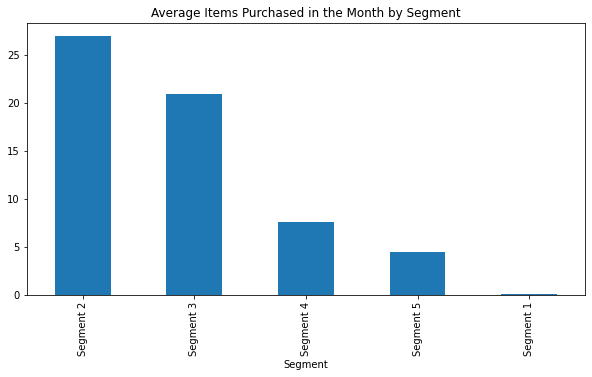

In [94]:
segments_items = seg_pca_kmeans.groupby('Segment').ItemsPurchased.mean().sort_values(ascending=False)
segments_items.plot(kind='bar', figsize=(10,5))
plt.title('Average Items Purchased in the Month by Segment')

Text(0.5, 1.0, 'Average Spend in the Month by Segment')

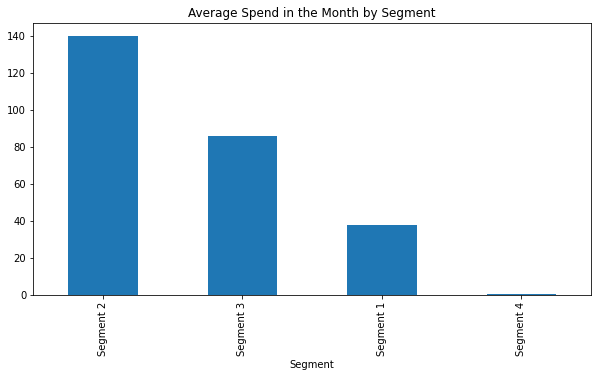

In [129]:
segments_spend = seg_pca_kmeans.groupby('Segment').totalPrice.mean().sort_values(ascending=False)
segments_spend.plot(kind='bar', figsize=(10,5))
plt.title('Average Spend in the Month by Segment')

## Prepare Features - Pre PCA Components

In [ ]:
features = features[:50000]

arr = features.values
arr

array([[2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.]])

In [ ]:
arr.shape

(50000, 10)

In [ ]:
arr = np.nan_to_num(arr)
arr

array([[2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#np.any(np.isnan(arr))
#np.all(np.isfinite(arr))

False

In [ ]:
scaler = StandardScaler()
scaler.fit(arr)
scaled_arr = scaler.transform(arr)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:808: RuntimeWarning: invalid value encountered in true_divide
  X /= self.scale_


In [ ]:
np.all(np.isfinite(scaled_arr))

False

In [ ]:
scaled_arr = np.nan_to_num(scaled_arr)

## Fit to K Means Clustering, try multiple k

Silhouette Score: 0.873
Silhouette Score: 0.824
Silhouette Score: 0.828
Silhouette Score: 0.343
Silhouette Score: 0.426
Silhouette Score: 0.798
Silhouette Score: 0.806
Silhouette Score: 0.425
Silhouette Score: 0.767
Silhouette Score: 0.788
Silhouette Score: 0.390
Silhouette Score: 0.296
Silhouette Score: 0.328
Silhouette Score: 0.775
Silhouette Score: 0.726
Silhouette Score: 0.354
Silhouette Score: 0.371
Silhouette Score: 0.358


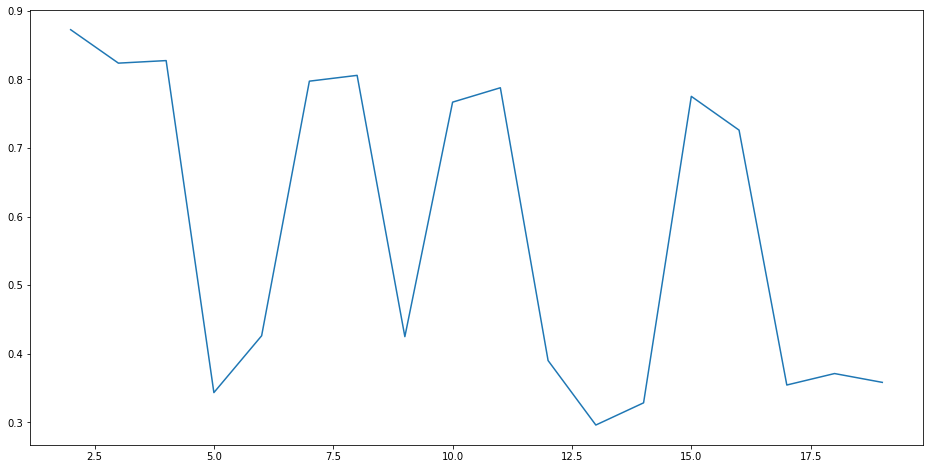

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

scores  = []
n_clusters = range(2,20)

for n_clu in n_clusters:
  kmeans = MiniBatchKMeans(init='k-means++', n_clusters=n_clu, batch_size=10000)
  kmeans.fit(scaled_arr)
  clusters_clients = kmeans.predict(scaled_arr)
  silhouette_avg = silhouette_score(scaled_arr, clusters_clients)
  print('Silhouette Score: {:<.3f}'.format(silhouette_avg))
  scores.append(silhouette_avg)
plt.figure(figsize=(16,8))
plt.plot(n_clusters, scores)

In [ ]:
inertias = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_arr)
    inertias.append(kmeanModel.inertia_)

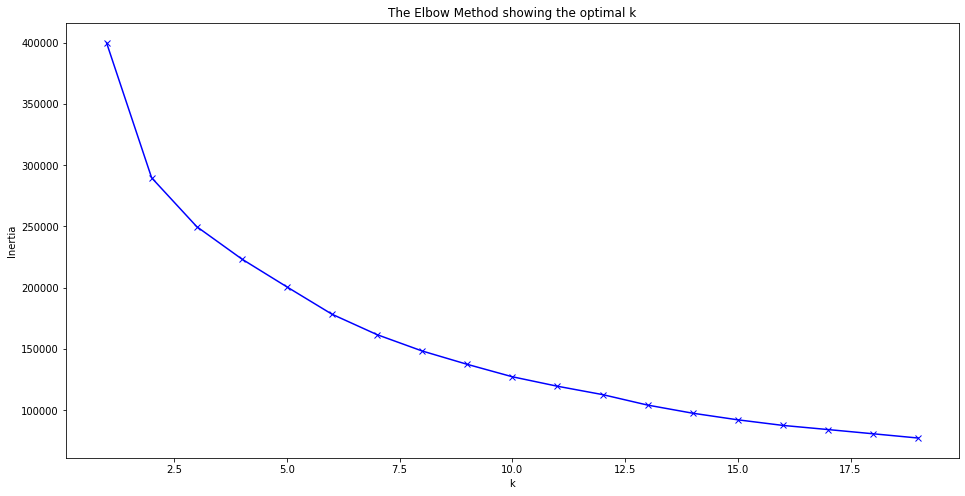

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
n_clusters = 10
kmeans = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, batch_size=10000)
kmeans.fit(scaled_arr)
clusters_clients = kmeans.predict(scaled_arr)

           1     7     0     8     6     5     3    2    9
Users  23088  9405  7173  3396  2860  1813  1148  783  334


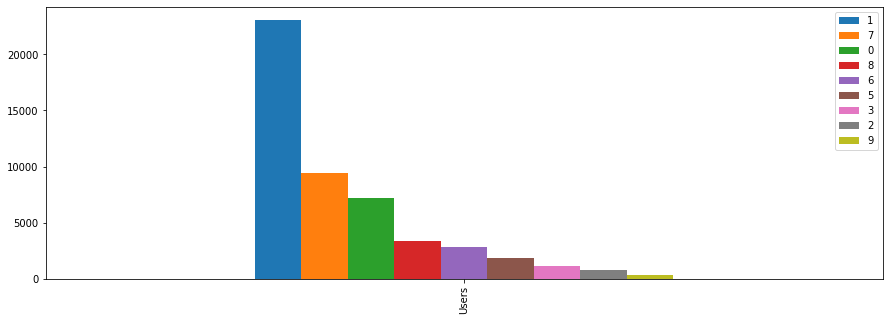

In [ ]:
cluster_check = pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['Users']).T
print(cluster_check )
cluster_check .plot(kind='bar', figsize=(15,5))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


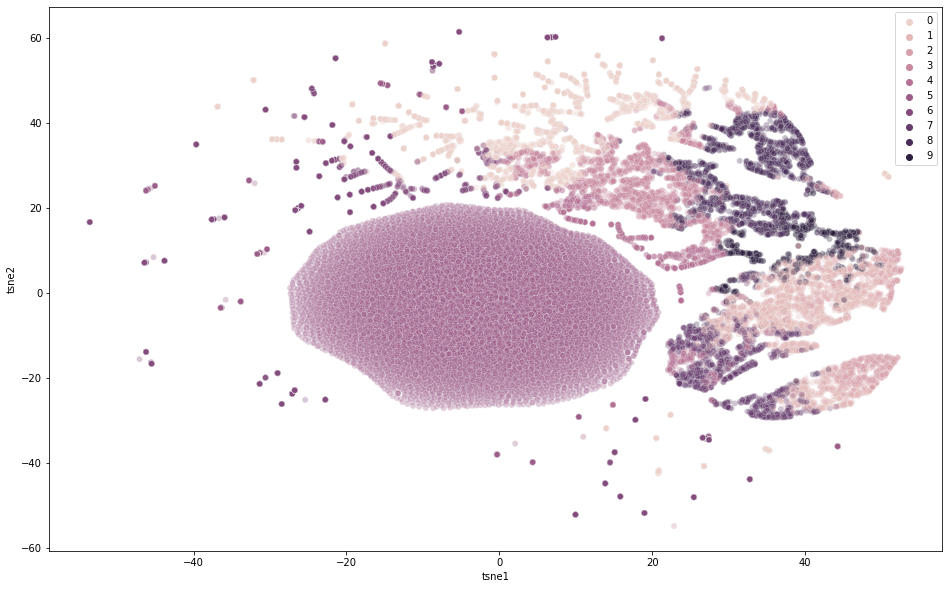

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

X = arr

X_embedded = TSNE(n_components=2).fit_transform(X)

df_subset = pd.DataFrame()
df_subset['tsne1'] = X_embedded[:,0]
df_subset['tsne2'] = X_embedded[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue=clusters_clients,
    #palette=sns.color_palette(colors[:n_clusters]),
    data=df_subset,
    legend="full",
    alpha=0.3
)